In [1]:
from ABMpy_region.model import Meta_ABM 
from ABMpy_region.agent import ABM
import numpy as np
import pickle
import copy
import matplotlib.pyplot as plt
import pandas as pd

## Basic Usage

### Single region ABM

In [2]:
''' basic params'''

# just a toy model
params={
        'nPop': 1000, # number of agents in regional ABM
        'actual_pop_scale': 1, # actual population size / nPop
        'global_day':200, # start at number days after 1/1/2020
    
        'A0':12, # initial number of agents in A
        'I0':10, # initial number of agents in I
        'A2I':0.45, # fraction of symptomatic cases in all cases
        'max_mix':30, # max possible mixing number per step for agents
        'S2A': 0.1, # senior female's infection probability per contact with infectios agent
        'gamma_M': 0.5,  # The scaling down factor for the number of contacts daily 
                    # of agents that are infected and  symptomatic
        'group_size': 30, # The size of groups in which interactions between agents of relatively more 
        'gamma': 0.9, # The probability that a meeting initiated by an agent is with their groupmate 
        
        # travel params
        'region': 'US.Maryland',  
        'country': 'US', 
        'c_I':800,  # scale factor to convert international importation risk to number of imported cases
        'c_D':1000,  # scale factor to convert domestic importation risk to number of imported cases
        'sim_travel':False, # only used without meta models,
                            # whether or not to simulate travel with actual COVID data
         
        # vaccine params
        'vaccine_date':10, # when to start vaccine in ABM, e.g. at step 10
        'vaccine_plan':{'total':20,'Pfizer':10,'J&J':10} # vaccines per day
        }



In [3]:
np.random.seed(0)

m=ABM(params=params)
# vaccinate senior first 
m.vaccine_senior_first=True

US.Maryland


In [6]:
#help(m)

In [6]:
m.run(steps=20)

step  1
update mixing array 0.0015 s
one v many meeting 0.0012 s, average 0.0685 ms
step  2
update mixing array 0.0005 s
one v many meeting 0.0015 s, average 0.0828 ms
step  3
update mixing array 0.0005 s
one v many meeting 0.002 s, average 0.0903 ms
step  4
update mixing array 0.0005 s
one v many meeting 0.0026 s, average 0.0872 ms
step  5
update mixing array 0.0005 s
one v many meeting 0.0036 s, average 0.0872 ms
step  6
update mixing array 0.0005 s
one v many meeting 0.0048 s, average 0.0834 ms
step  7
update mixing array 0.0005 s
one v many meeting 0.0062 s, average 0.0765 ms
step  8
update mixing array 0.0006 s
one v many meeting 0.0078 s, average 0.0703 ms
step  9
update mixing array 0.0006 s
one v many meeting 0.0091 s, average 0.0643 ms
step  10
update mixing array 0.0006 s
one v many meeting 0.011 s, average 0.0626 ms
vac
vac senior first
step  11
update mixing array 0.0007 s
one v many meeting 0.0125 s, average 0.0588 ms
vac
vac senior first
step  12
update mixing array 0.000

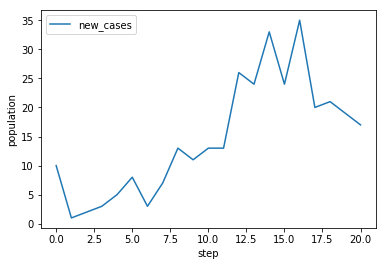

In [7]:
m.plot_data(col=['new_cases'])

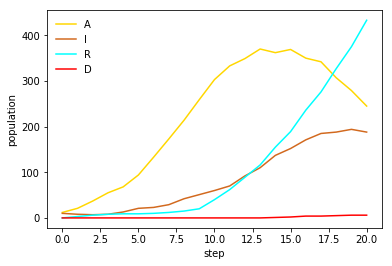

In [8]:
m.plot_compartments()

In [9]:
# time series
m.data
# 0,1,2,3,4: S,A,I,R,D

,0,1,2,3,4,new_cases,cum_case,prevalence,vaccinated
0,978,12,10,0,0,10,10,0.018,0
1,968,21,8,3,0,1,11,0.018,0
2,950,37,7,6,0,2,13,0.022,0
3,929,55,8,8,0,3,16,0.030,0
4,910,68,13,9,0,5,21,0.041,0
5,876,94,21,9,0,8,29,0.058,0
6,834,133,23,10,0,3,32,0.081,0
7,786,173,29,12,0,7,39,0.111,0
8,729,214,42,15,0,13,52,0.142,0
9,670,259,51,20,0,11,63,0.177,0


In [10]:
# agent data frame
df = m.agents_df()
df.head()

,ID,state,timeA,timeI,num_mix,state_after_A,time_in_A,state_after_I,time_in_I,infectious_yn,...,generation,I0,region,demo_group,sex,age,race_higher_risk,vaccinated,risk_reduction,group
0,0,1,1,0,13,2,2,-1,0,1,...,6,0,US.Maryland,0,0,0,0,0,1.00,0
1,1,1,6,0,16,3,9,-1,0,1,...,7,0,US.Maryland,3,1,0,0,0,1.00,0
2,2,2,9,5,6,2,9,3,13,1,...,4,0,US.Maryland,1,0,1,0,0,1.00,0
3,3,0,0,0,1,-1,0,-1,0,0,...,0,0,US.Maryland,3,1,0,0,1,0.05,0
4,4,2,3,0,1,2,3,3,14,1,...,6,0,US.Maryland,1,0,1,0,0,1.00,0


### Meta ABM with multiple regions

In [7]:
params1=params.copy()
params1['region']='US.Virginia'

params2=params.copy()
params2['region']='US.Delaware'

In [8]:
np.random.seed(0)

m0=ABM(params=params)
m1=ABM(params=params1)
m2=ABM(params=params2)

meta=Meta_ABM(ABM=[m0,m1,m2])

US.Maryland
US.Virginia
US.Delaware


In [9]:
help(meta)

Help on Meta_ABM in module ABMpy_region.model object:

class Meta_ABM(builtins.object)
 |  Meta_ABM(ABM=[])
 |  
 |  global model
 |  consists of a list of individual ABM, handles their travels
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ABM=[])
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  plot_compartments(self)
 |      plot compartment time series
 |  
 |  plot_data(self, col=['new_cases'])
 |      plot just one column from data frame
 |  
 |  run(self, steps=1, multiprocessing=False)
 |      run model for steps
 |  
 |  step(self, multiprocessing=False)
 |      daily evolution
 |      1) travel
 |      2) run regional models
 |      3) update dataframe
 |  
 |  travel_replace(self)
 |      NOT USED
 |      simulate travels from j->i 
 |      by replacing attributes of agents in i by attributes of agents in j, 
 |      without actually moving agents from j to i
 |      conserving number of agents in all regions
 |  
 |  travel_simple(self

In [13]:
meta.run(steps=20)

{'US': 3.0000000000000004e-05, 'US.Maryland': 1e-05, 'US.Virginia': 1e-05, 'US.Delaware': 1e-05}
international {'US.Maryland': 0, 'US.Virginia': 0, 'US.Delaware': 0}
demo {'US.Maryland': 1.7652790912692827e-06, 'US.Virginia': 1.5188332302265388e-06, 'US.Delaware': 1.9686201456755026e-06}
US.Maryland 0
US.Virginia 0
US.Delaware 0
region 0
step  1
update mixing array 0.0008 s
one v many meeting 0.0015 s, average 0.0823 ms
region 1
step  1
update mixing array 0.0008 s
one v many meeting 0.0016 s, average 0.0783 ms
region 2
step  1
update mixing array 0.0008 s
one v many meeting 0.0014 s, average 0.0863 ms
{'US': 2e-06, 'US.Maryland': 0.0, 'US.Virginia': 1e-06, 'US.Delaware': 1e-06}
international {'US.Maryland': 0, 'US.Virginia': 0, 'US.Delaware': 0}
demo {'US.Maryland': 1.7652790912692825e-07, 'US.Virginia': 6.362301947063499e-08, 'US.Delaware': 5.397480683174433e-08}
US.Maryland 0
US.Virginia 0
US.Delaware 0
region 0
step  2
update mixing array 0.0005 s
one v many meeting 0.0016 s, avera

region 1
step  14
update mixing array 0.0008 s
one v many meeting 0.0196 s, average 0.0486 ms
vac
region 2
step  14
update mixing array 0.0008 s
one v many meeting 0.0193 s, average 0.0493 ms
vac
{'US': 8.5e-05, 'US.Maryland': 3.7e-05, 'US.Virginia': 2.4e-05, 'US.Delaware': 2.4e-05}
international {'US.Maryland': 0, 'US.Virginia': 0, 'US.Delaware': 0}
demo {'US.Maryland': 4.236669819046279e-06, 'US.Virginia': 4.792583698719938e-06, 'US.Delaware': 6.582222050186683e-06}
US.Maryland 0
US.Virginia 0
US.Delaware 0
region 0
step  15
update mixing array 0.0007 s
one v many meeting 0.0198 s, average 0.0463 ms
vac
region 1
step  15
update mixing array 0.0008 s
one v many meeting 0.0211 s, average 0.0476 ms
vac
region 2
step  15
update mixing array 0.0007 s
one v many meeting 0.0198 s, average 0.0473 ms
vac
{'US': 8.6e-05, 'US.Maryland': 2.1e-05, 'US.Virginia': 3.1e-05, 'US.Delaware': 3.4e-05}
international {'US.Maryland': 0, 'US.Virginia': 0, 'US.Delaware': 0}
demo {'US.Maryland': 5.81985622481

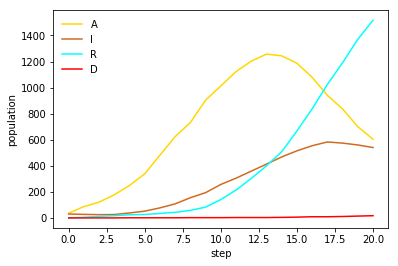

In [12]:
meta.plot_compartments()

In [13]:
meta.data

,0,1,2,3,4,new_cases,cum_case,slence,vaccinated,prevalence
0,2934.0,36.0,30.0,0.0,0.0,30.0,30.0,0.0,0.0,0.018667
1,2881.0,87.0,27.0,5.0,0.0,2.0,32.0,0.0,0.0,0.019000
2,2842.0,121.0,25.0,12.0,0.0,5.0,37.0,0.0,0.0,0.023667
3,2779.0,178.0,26.0,17.0,0.0,6.0,43.0,0.0,0.0,0.034333
4,2688.0,249.0,38.0,24.0,1.0,17.0,60.0,0.0,0.0,0.048000
5,2582.0,339.0,52.0,26.0,1.0,15.0,75.0,0.0,0.0,0.068000
6,2406.0,482.0,77.0,34.0,1.0,28.0,103.0,0.0,0.0,0.097000
7,2224.0,624.0,108.0,43.0,1.0,34.0,137.0,0.0,0.0,0.131667
8,2053.0,732.0,155.0,58.0,2.0,50.0,187.0,0.0,0.0,0.180000
9,1817.0,904.0,194.0,83.0,2.0,45.0,232.0,0.0,0.0,0.225333


In [17]:
meta.ABM[0].data

,0,1,2,3,4,new_cases,cum_case,prevalence,vaccinated
0,978,12,10,0,0,10,10,0.018,0
1,956,34,7,3,0,0,10,0.021,0
2,941,45,8,6,0,4,14,0.026,0
3,920,61,11,8,0,5,19,0.038,0
4,884,89,18,9,0,7,26,0.057,0
5,843,127,20,10,0,3,29,0.080,0
6,782,176,31,11,0,12,41,0.115,0
7,730,213,44,13,0,13,54,0.152,0
8,674,238,66,22,0,23,77,0.201,0
9,596,292,79,33,0,16,93,0.231,0
